# 02 – Data Preprocessing

This notebook performs all preprocessing steps required before model training:
- Column naming and cleanup
- Target variable encoding
- Train-test split
- Categorical feature encoding
- Numerical feature scaling
- Saving final processed datasets

This ensures the model receives clean, numeric, ML-ready data.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv("../data/raw/loan_data.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [3]:
# Load & Label the Data
cols = [
    "gender", "age", "debt", "marital_status", "bank_customer",
    "education", "ethnicity", "years_employed",
    "prior_default", "employed", "credit_score",
    "drivers_license", "citizen", "zip_code",
    "income", "approval"
]

df = pd.read_csv("../data/raw/loan_data.csv", header=None, names=cols)
df 

,gender,age,debt,marital_status,bank_customer,education,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,zip_code,income,approval
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [4]:
df["approval"] = df["approval"].map({"+": 1, "-": 0})

Rows with missing values (marked as '?') are dropped rather than imputed. Given the sensitivity of financial loan data, we chose to prioritize data quality over quantity to avoid introducing synthetic bias through mean/mode imputation.

In [5]:
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

In [6]:
X = df.drop("approval", axis=1)
y = df["approval"]

After data cleaning we left with less number of row in data so we decide to leave less data for test so the testing split was only 5%.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.05,
    stratify=y)

In [8]:
categorical_cols = ['gender', 'marital_status', 'bank_customer', 'education', 'ethnicity', 'prior_default', 'employed', 'drivers_license', 'citizen']
numerical_cols = ['age', 'debt', 'years_employed', 'credit_score', 'income']

We used OneHotEncoder for categorical variables to avoid implying an ordinal relationship where none exists (e.g., gender or occupation).

In [9]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

In [10]:
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

In [11]:
X_train_cat_df = pd.DataFrame(
    X_train_cat,
    columns=encoded_feature_names,
    index=X_train.index
)

X_test_cat_df = pd.DataFrame(
    X_test_cat,
    columns=encoded_feature_names,
    index=X_test.index
)

StandardScaler was applied to numerical features like 'income' and 'debt' because the Logistic Regression model is sensitive to feature scaling and to handle a few outliers existing in dataset.

In [12]:
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[numerical_cols])
X_test_num = scaler.transform(X_test[numerical_cols])

In [13]:
X_train_num_df = pd.DataFrame(
    X_train_num,
    columns=numerical_cols,
    index=X_train.index
)

X_test_num_df = pd.DataFrame(
    X_test_num,
    columns=numerical_cols,
    index=X_test.index
)

In [14]:
X_train_final = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

In [15]:
train_df = X_train_final.copy()
train_df["approval"] = y_train

test_df = X_test_final.copy()
test_df["approval"] = y_test


In [16]:
train_df.to_csv("../data/processed/train_data.csv", index=False)
test_df.to_csv("../data/processed/test_data.csv", index=False)
print("CLEAN DATA CSV SAVED, DATA PREPROCESSING COMPLETED!")

CLEAN DATA CSV SAVED, DATA PREPROCESSING COMPLETED!


In [17]:
train_df.head()

,age,debt,years_employed,credit_score,income,gender_a,gender_b,marital_status_l,marital_status_u,marital_status_y,...,prior_default_f,prior_default_t,employed_f,employed_t,drivers_license_f,drivers_license_t,citizen_g,citizen_p,citizen_s,approval
637,-1.018529,0.970646,-0.425881,-0.494565,-0.128593,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
300,2.221482,-0.552572,1.258752,-0.294153,-0.191798,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0
309,0.023754,-0.351752,-0.658956,-0.494565,-0.189939,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
678,-1.152962,1.096159,-0.658956,-0.494565,-0.184362,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
323,1.455723,-0.913043,-0.585198,1.709966,0.314215,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1


## CORR

In [18]:
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
numeric_features

Index(['debt', 'years_employed', 'credit_score', 'income', 'approval'], dtype='object')

In [19]:
corr_matrix = df[numeric_features].corr()

In [20]:
corr_with_approval = corr_matrix["approval"].drop("approval")
corr_with_approval.sort_values(ascending=False)

credit_score      0.406052
years_employed    0.332728
debt              0.207086
income            0.172766
Name: approval, dtype: float64

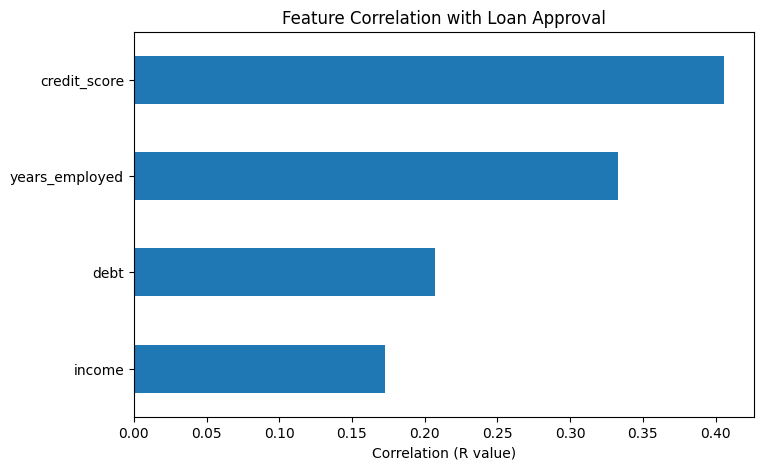

In [21]:
import matplotlib.pyplot as plt

corr_with_approval.sort_values().plot(
    kind="barh", figsize=(8,5)
)

plt.xlabel("Correlation (R value)")
plt.title("Feature Correlation with Loan Approval")
plt.show()

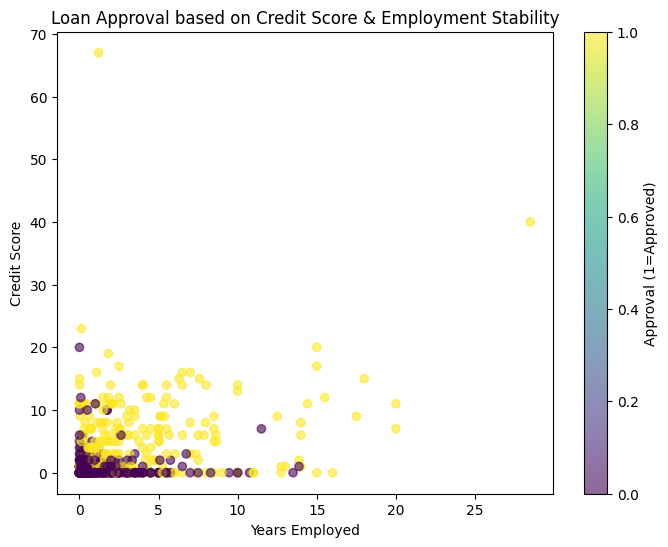

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    df["years_employed"],
    df["credit_score"],
    c=df["approval"],
    alpha=0.6
)
plt.xlabel("Years Employed")
plt.ylabel("Credit Score")
plt.title("Loan Approval based on Credit Score & Employment Stability")
plt.colorbar(label="Approval (1=Approved)")
plt.show()

In [23]:
import joblib

joblib.dump(encoder, "../results/encoder.pkl")
joblib.dump(scaler, "../results/scaler.pkl")

['../results/scaler.pkl']